### Loading data binaries

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/vanderbilt/")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
from src.io.loadbinary import LoadBinary

In [4]:
filepath = "/home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat"

#### Plot load binary function docstring

In [5]:
perpl_LoadBinary?

Object `perpl_LoadBinary` not found.


#### Load data

In [6]:
n = 1000

In [7]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=None,
    channels=None,
    downsample=30,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
    verbose=True,
)

INFO:root:Loading binaries from /home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat with:
fsample = 30000, start = 0, duration = None, offset = 0, nSamplesPerChannel = None, nChannels = 64, precision = <class 'numpy.int16'>, downsample = 30, bitVolts = 0.195.
100%|████████████████████████████████████████████████████████████████████████████████| 102295/102295 [09:16<00:00, 183.67it/s]


In [8]:
print(data)
print(data.shape)

<xarray.DataArray (times: 15958124, channels: 64)>
array([[ -51.675,   -1.17 ,   48.165, ...,   27.105,   25.74 ,   22.425],
       [ -41.535,   -1.755,   54.99 , ...,   22.425,   32.955,   15.21 ],
       [ -58.5  ,   20.085,   35.88 , ...,   55.38 ,   55.185,   58.5  ],
       ...,
       [-190.32 ,  -59.865,   17.16 , ..., -103.545, -122.07 , -101.595],
       [-161.655,  -43.095,   43.485, ...,  -86.19 ,  -88.92 ,  -93.99 ],
       [-168.87 ,  -77.415,    8.58 , ...,  -74.88 ,  -92.43 ,  -76.635]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times
(15958124, 64)


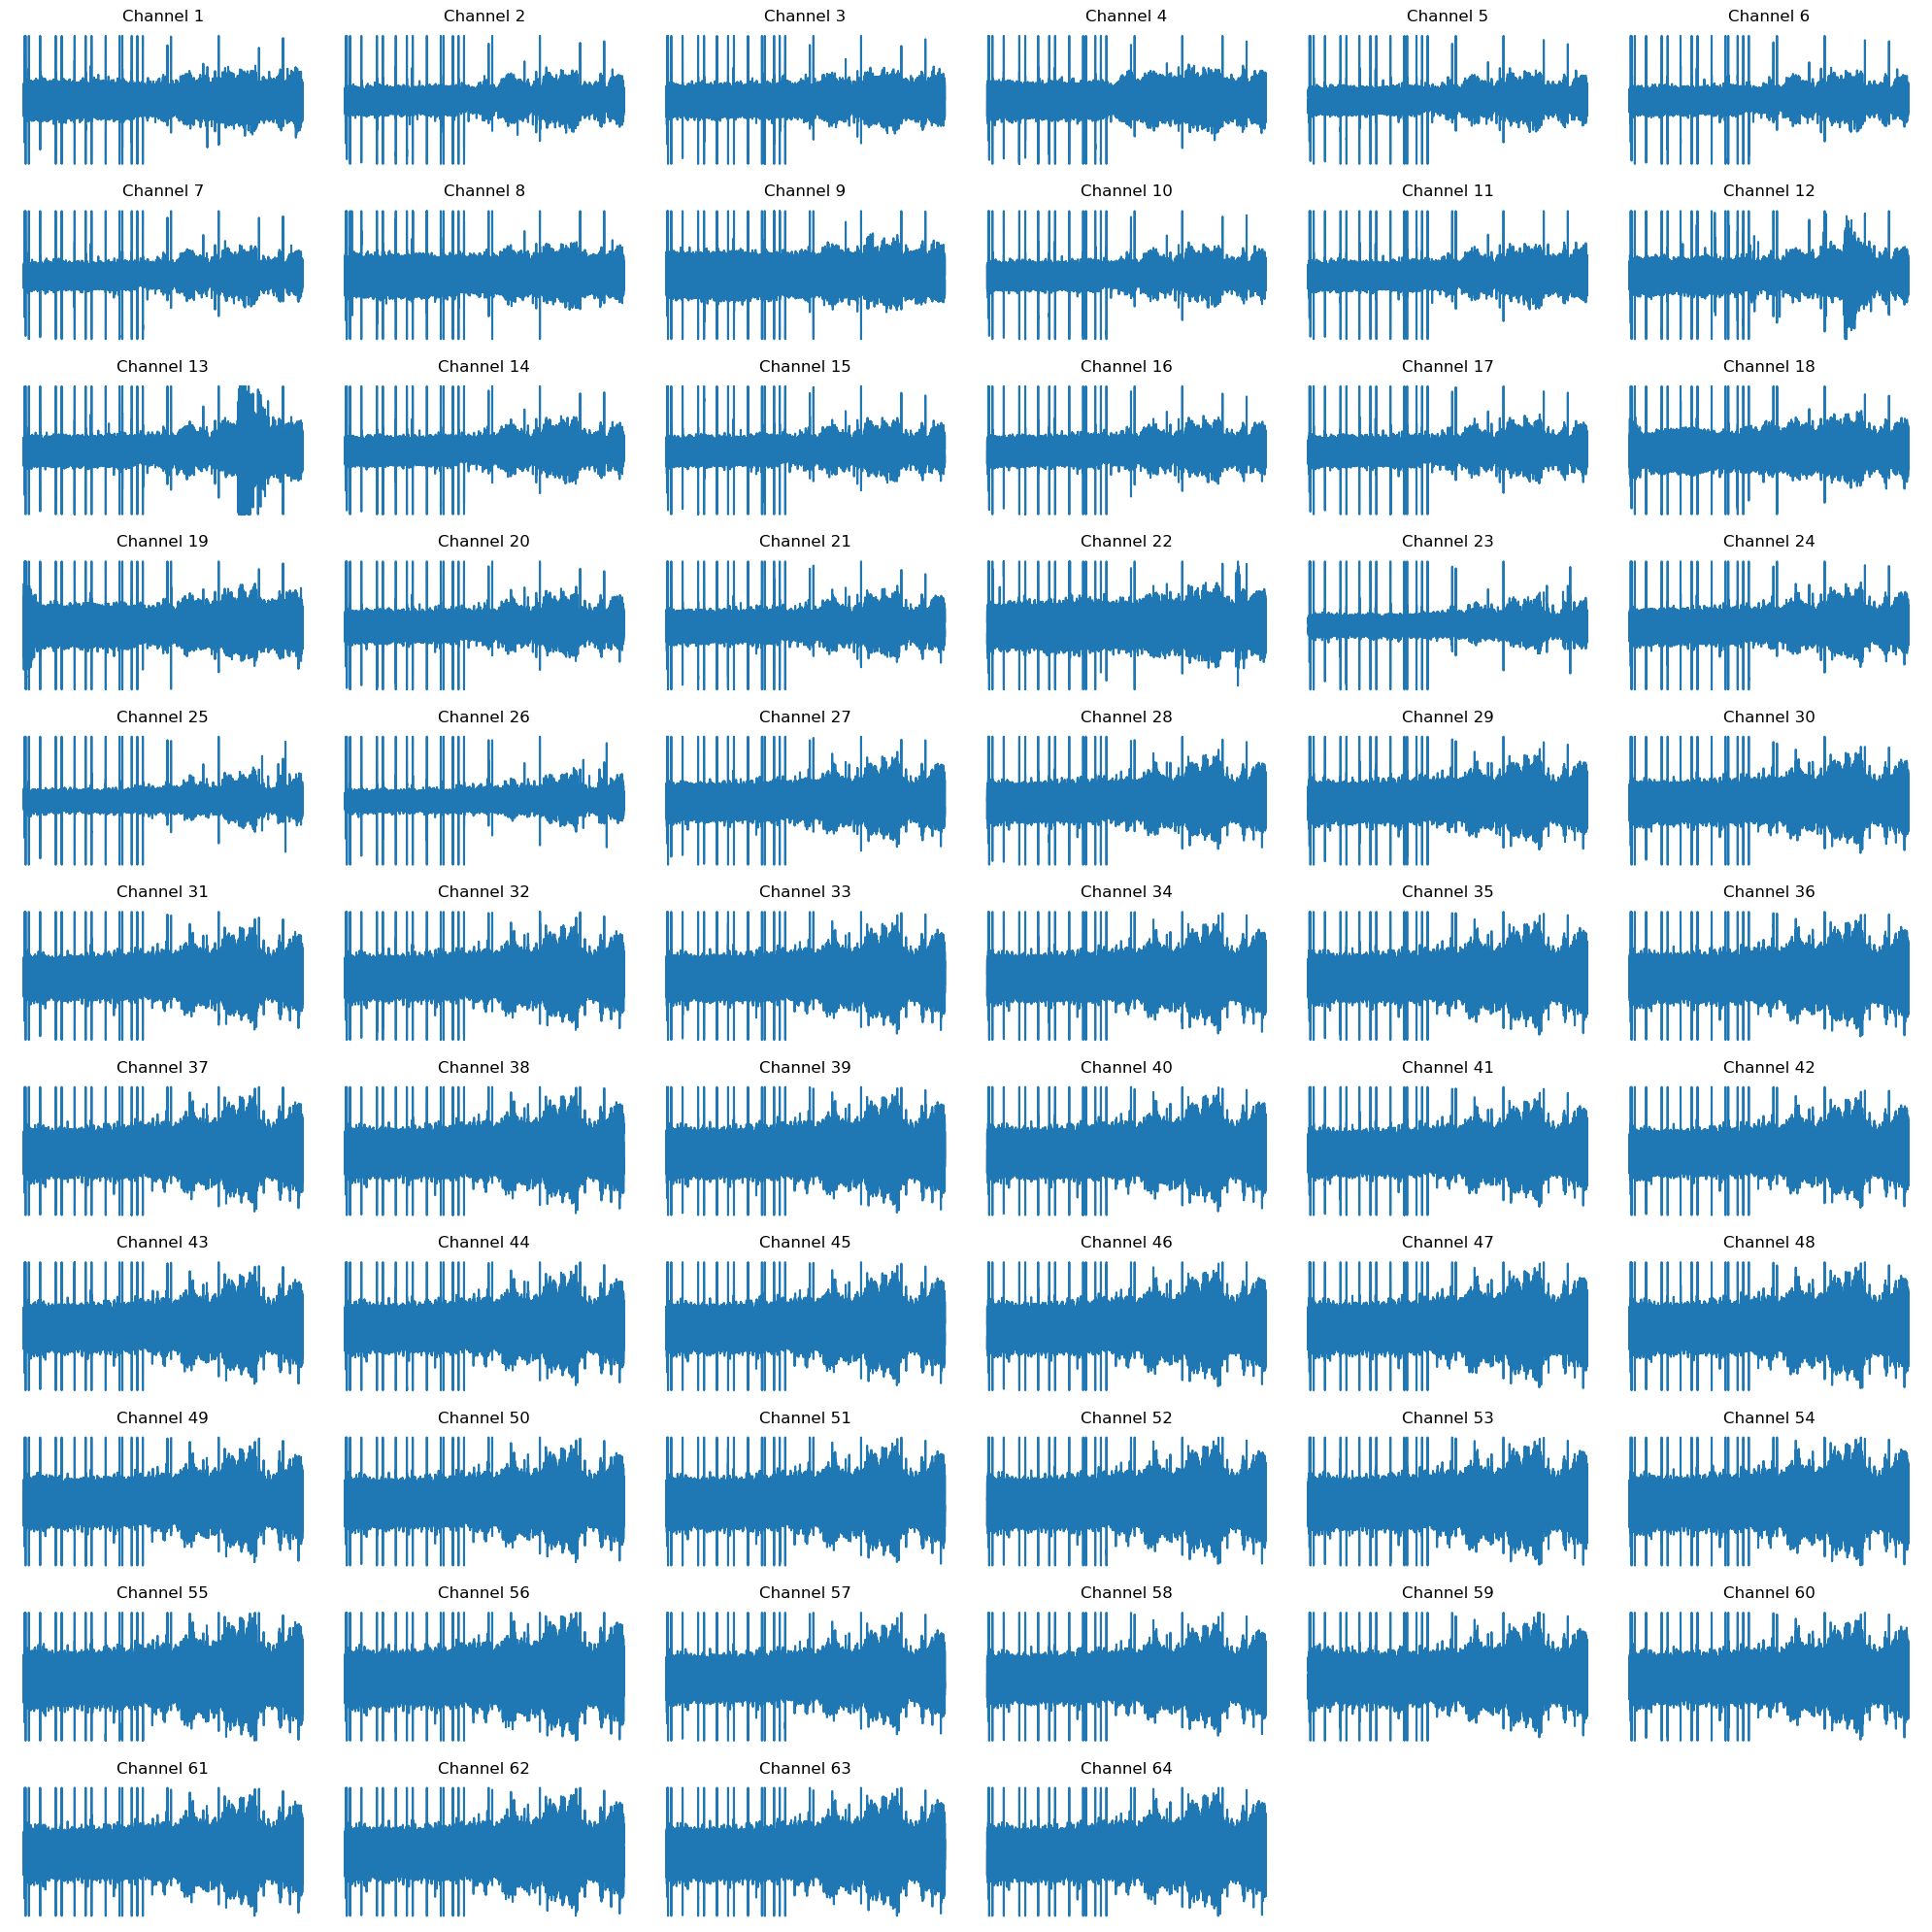

In [9]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [10]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

#### Different durations (in seconds)

### Using Data Loader to load and preprocess raw data

In [11]:
from src.io.dataloader import DataLoader

In [12]:
loader = DataLoader(filepath)

In [13]:
loader.loadbinary(nSamplesPerChannel=100000, downsample=30)

In [14]:
loader.data

<xarray.DataArray (times: 3333, channels: 64)>
array([[-51.675,  -1.17 ,  48.165, ...,  27.105,  25.74 ,  22.425],
       [-41.535,  -1.755,  54.99 , ...,  22.425,  32.955,  15.21 ],
       [-58.5  ,  20.085,  35.88 , ...,  55.38 ,  55.185,  58.5  ],
       ...,
       [-15.015, -15.6  , -28.665, ...,  23.985,  36.075,  33.15 ],
       [ 48.555,  12.285, -14.43 , ...,  40.95 ,  45.63 ,  72.345],
       [ 24.375, -20.865, -40.365, ...,  33.54 ,  86.58 ,  69.03 ]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times

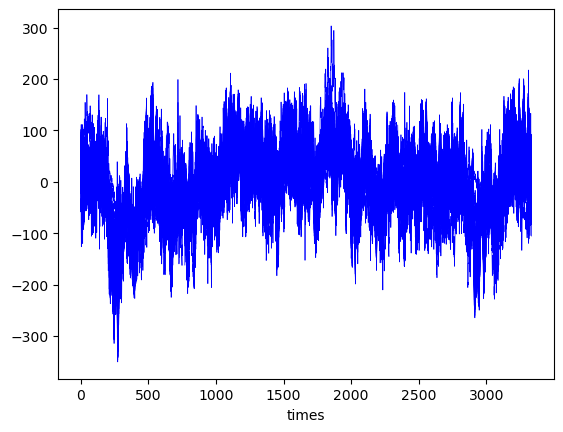

In [15]:
loader.data.plot(hue="channels", color="b", lw=0.5)
plt.legend([], frameon=False)

In [16]:
loader.filter(0, 120, {})

True
Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 111 samples (0.111 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


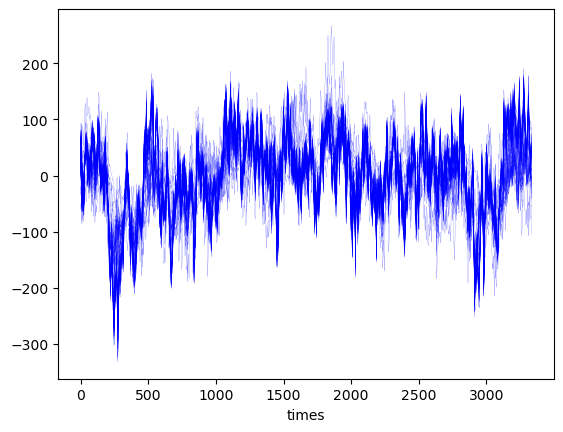

In [17]:
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)